# Required Libraries 

In [2]:
# ! pip install glob2
# ! pip install pytest-shutil
# pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
# pip install monai
# pip install dicom2nifti
# pip install nibabel
# ! pip install numpy
# pip install tqdm
# ! pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 960.0/960.0 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 961.1 kB/s eta 0:00:00
     -------------------------------------- 162.0/162.0 kB 1.6 MB/s eta 0:00:00


# Importing Required Libraries

In [ ]:
import os  # For Perfroming file Operations
from glob import glob # To retrieve all the matching paths while file conversions and modificaiton
import shutil #to Perform operation on files and folders 
from tqdm import tqdm # provides shortcut functions for loops 
import dicom2nifti #for converting dcm to nifti file
import numpy as np # Numerical operations
import nibabel as nib 
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import first
from monai.utils import set_determinism
import matplotlib.pyplot as plt

# Creating Group of 65 Slices


In [3]:
input_path= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\file\labels"
output_path= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\groups\labels"



## For Labels

In [4]:
for patient in glob(input_path+"/*"):
    patient_name=os.path.basename(os.path.normpath(patient))
    number_folders=int(len(glob(patient+"/*"))/64)
    
    
    for i in range(number_folders):
        output_path_l = os.path.join(output_path, patient_name + '_' + str(i))
        os.mkdir(output_path_l)
        
        for i, file in enumerate(glob(patient + '/*')):
            if i == 65:
                break

            shutil.move(file, output_path_l)

## For Images

In [5]:
input_path= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\file\images"
output_path= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\groups\images"

In [6]:
for patient in glob(input_path+"/*"):
    patient_name=os.path.basename(os.path.normpath(patient))
    number_folders=int(len(glob(patient+"/*"))/64)
    
    
    for i in range(number_folders):
        output_path_l = os.path.join(output_path, patient_name + '_' + str(i))
        os.mkdir(output_path_l)
        
        for i, file in enumerate(glob(patient + '/*')):
            if i == 65:
                break

            shutil.move(file, output_path_l)

# DCM to Nii Conversion

## For Images

In [ ]:
input_path_images= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\groups\images\*"
output_path_images= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\nii_files\images"

list_images=glob(input_path_images)
for patient in list_images:
    patient_name = os.path.basename(os.path.normpath(patient))
    
    dicom2nifti.dicom_series_to_nifti(patient, os.path.join(output_path_images, patient_name + '.nii.gz'))

## For Labels

In [ ]:
input_path_labels= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\groups\labels\*"
output_path_labels= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\nii_files\labels"

list_labels=glob(input_path_labels)
for patient in list_labels:
    patient_name = os.path.basename(os.path.normpath(patient))
    
    dicom2nifti.dicom_series_to_nifti(patient, os.path.join(output_path_labels, patient_name + '.nii.gz'))

In [17]:
output_path_labels= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\nii_files\labels"
output_path_images= r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\nii_files\images"

# Empty Segmentations

In [5]:
empty_segmentations = []
segmentations=glob(os.path.join(output_path_labels, '*'))
for patient in segmentations:
    img = nib.load(patient)
    array = np.unique(img.get_fdata())

    if len(array) == 1:
        empty_segmentations.append(os.path.basename(os.path.normpath(patient)))

empty_segmentations

['liver_100_0.nii.gz',
 'liver_100_1.nii.gz',
 'liver_100_2.nii.gz',
 'liver_100_3.nii.gz',
 'liver_100_4.nii.gz',
 'liver_101_0.nii.gz',
 'liver_101_1.nii.gz',
 'liver_101_2.nii.gz',
 'liver_101_3.nii.gz',
 'liver_101_4.nii.gz',
 'liver_102_0.nii.gz',
 'liver_102_1.nii.gz',
 'liver_102_2.nii.gz',
 'liver_102_3.nii.gz',
 'liver_103_0.nii.gz',
 'liver_103_1.nii.gz',
 'liver_103_2.nii.gz',
 'liver_103_3.nii.gz',
 'liver_103_4.nii.gz',
 'liver_103_5.nii.gz',
 'liver_104_0.nii.gz',
 'liver_104_1.nii.gz',
 'liver_104_10.nii.gz',
 'liver_104_11.nii.gz',
 'liver_104_2.nii.gz',
 'liver_104_3.nii.gz',
 'liver_104_8.nii.gz',
 'liver_104_9.nii.gz',
 'liver_105_0.nii.gz',
 'liver_105_1.nii.gz',
 'liver_105_10.nii.gz',
 'liver_105_11.nii.gz',
 'liver_105_12.nii.gz',
 'liver_105_13.nii.gz',
 'liver_105_14.nii.gz',
 'liver_105_2.nii.gz',
 'liver_105_3.nii.gz',
 'liver_105_4.nii.gz',
 'liver_106_0.nii.gz',
 'liver_106_1.nii.gz',
 'liver_106_10.nii.gz',
 'liver_106_11.nii.gz',
 'liver_106_2.nii.gz',
 '

In [6]:
len(empty_segmentations)

473

# Removing images and labels with Empty Segmentation

Empty Segementation might decrease model accuracy and will increase trainning time


In [18]:
output_path_images_empty=r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\nii_files\temp\empty_images"
output_path_labels_empty=r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\nii_files\temp\empty_labels"
for file in empty_segmentations:
    img=os.path.join(output_path_images,file)
    lbl=os.path.join(output_path_labels,file)
    shutil.move(img, output_path_images_empty)
    shutil.move(lbl, output_path_labels_empty)

# Data preprocessing for U-Net model


In [12]:
def prepare(in_dir, pixdim=(1.5, 1.5, 1.0), a_min=-200, a_max=200, spatial_size=[128,128,64], cache=False):

    

    set_determinism(seed=0)

    path_train_volumes = sorted(glob(os.path.join(in_dir, "TrainVolumes", "*.nii.gz")))
    path_train_segmentation = sorted(glob(os.path.join(in_dir, "TrainSegmentation", "*.nii.gz")))

    path_test_volumes = sorted(glob(os.path.join(in_dir, "TestVolumes", "*.nii.gz")))
    path_test_segmentation = sorted(glob(os.path.join(in_dir, "TestSegmentation", "*.nii.gz")))

    train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
    test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]

    train_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            AddChanneld(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True), 
            CropForegroundd(keys=["vol", "seg"], source_key="vol"),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),   
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    test_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            AddChanneld(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max,b_min=0.0, b_max=1.0, clip=True), 
            CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),   
            ToTensord(keys=["vol", "seg"]),

            
        ]
    )

    if cache:
        train_ds = CacheDataset(data=train_files, transform=train_transforms,cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = CacheDataset(data=test_files, transform=test_transforms, cache_rate=1.0)
        test_loader = DataLoader(test_ds, batch_size=1)
        
        

        return train_loader, test_loader

    else:
        train_ds = Dataset(data=train_files, transform=train_transforms)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = Dataset(data=test_files, transform=test_transforms)
        test_loader = DataLoader(test_ds, batch_size=1)

        return train_loader, test_loader

In [13]:
def show_patient(data, SLICE_NUMBER=1, train=True, test=False):


    check_patient_train, check_patient_test = data

    view_train_patient = first(check_patient_train)
    view_test_patient = first(check_patient_test)

    
    if train:
        plt.figure("Visualization Train", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"vol {SLICE_NUMBER}")
        plt.imshow(view_train_patient["vol"][0, 0, :, :, SLICE_NUMBER], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title(f"seg {SLICE_NUMBER}")
        plt.imshow(view_train_patient["seg"][0, 0, :, :, SLICE_NUMBER])
        plt.show()
    
    if test:
        plt.figure("Visualization Test", (12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"vol {SLICE_NUMBER}")
        plt.imshow(view_test_patient["vol"][0, 0, :, :, SLICE_NUMBER], cmap="gray")

        plt.subplot(1, 2, 2)
        plt.title(f"seg {SLICE_NUMBER}")
        plt.imshow(view_test_patient["seg"][0, 0, :, :, SLICE_NUMBER])
        plt.show()

In [14]:
from datetime import datetime

In [15]:
in_dir=r"C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\train_test"
startTime = datetime.now()
train_loader, test_loader = prepare(in_dir,cache=True)
print(datetime.now() - startTime)

Loading dataset: 100%|█████████████████████████████████████████████████████████████████| 71/71 [03:24<00:00,  2.87s/it]

0:18:40.645553


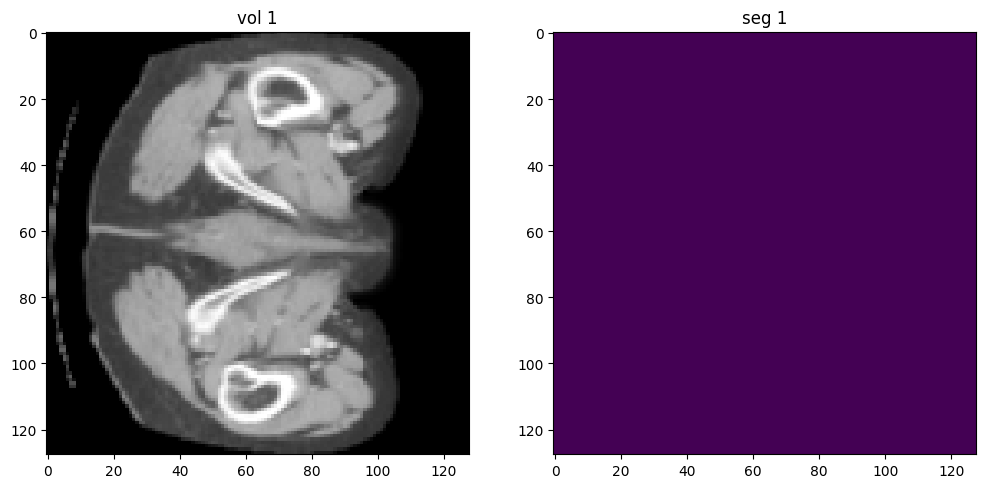

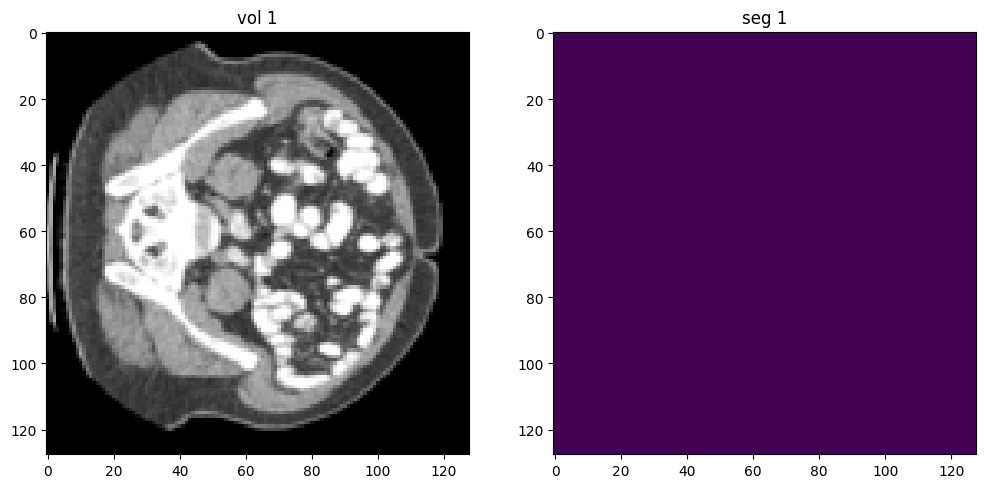

In [19]:
patient=[train_loader, test_loader]
show_patient(patient,test=True)